# Seperating stock to forcast for certain dates depending on the product

In [1]:
%pip install nbformat pandas numpy matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import sys
sys.path.append('../../src')

In [4]:
from data_config import ProductHandler as ph

d:\SCM---ML-Visualisation\notebooks\random_forest\../../src\datasets.py:13: DtypeWarning: Columns (4,6,20,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  products_s = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\random_forest\../../src\datasets.py:15: DtypeWarning: Columns (5,29,42,48) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_i = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\random_forest\../../src\datasets.py:18: DtypeWarning: Columns (43,57,106,141,146,211,212,247,255,294,298,316,327,332,350,354) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_m = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\random_forest\../../src\datasets.py:21: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  sp_inv_adds = pd.read_csv(


----- DROP BOOLEAN AND NULL COLUMNS (NOT NEEDED) -----

Merged Data - Columns to be dropped (Missing Vals): ['BackStage_DefaultReportForm', 'BackStage_SmartMarkSet', 'BillCounty', 'CoreType', 'EndUserNum', 'EndUserPO', 'Equip3_ID', 'Equip3_Status', 'Est_v_Act_Notes', 'Ink_Status', 'JDF_Note_to_DFE', 'JDF_Send_Msg', 'MiscChargeDesc1', 'MiscChargeDesc2', 'MiscChargeDesc3', 'MiscChargeDesc4', 'PlateStat', 'ProofStat', 'Roto_CEL_Product_ID', 'Roto_Quote_Line_ID', 'Roto_Quote_Number', 'Schedule_Status', 'ShipAttn_EmailAddress', 'ShipCounty', 'ShipStat', 'Tag_x', 'Tool3Descr', 'Tool4Descr', 'Tool5Descr', 'ToolNo3', 'ToolNo4', 'ToolNo5', 'ToolStat', 'UserDef_MR_1_Lb', 'UserDef_MR_2_Lb', 'Assigned', 'Desc2_x', 'ediLineNumber', 'eTraxx_Customer_Notes', 'Location_x', 'PO_Number', 'Adhesive', 'Alternate', 'eTraxx_Forecast_Range', 'Material', 'Tag_y', 'UPC']

Merged Data - Columns to be dropped (All cols with rows same vals): ['Act_OTHER_Hours', 'ActArtwork', 'ActFinMaterial', 'ActPostPressHours',

d:\SCM---ML-Visualisation\notebooks\random_forest\../../src\datasets.py:108: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['OrderDate'] = pd.to_datetime(
d:\SCM---ML-Visualisation\notebooks\random_forest\../../src\datasets.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['OrderDate'] = pd.to_datetime(
d:\SCM---ML-Visualisation\notebooks\random_forest\../../src\datasets.py:110: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['Ship_by_

In [5]:
ph.custom_prod_set()

All custom codes for existing products: 
{'Z-3', '02Y', '47X', 'UT-', '891', '07Q', '41T', '9-0', '830', '990', '18W', 'HCO', '12Q', '813', '71Y', '811', '58X', '864', '12W', 'MJ-', '564', '53W', 'SI-', 'BFS', 'WTI', 'GFC', '49Y', 'CSI', '808', '89Y', '48U', 'CLV', '01U', '013', '34Y', '919', 'IM-', '132', '121', '701', '91Z', '313', '283', 'Q-0', 'STR', 'Z-4', '883', '02Z', '54W', '07T', '10U', '523', '000', '26Y', '56X', '96U', 'ARO', '417', 'H-0', '604', '739', 'W-T', '309', '231', '21W', '338', '046', '545', '12R', 'UN-', 'FF-', '27X', '049', 'BSF', '39R', '67V', '020', '062', '91V', 'LC-', '348', '95W', '483', '07S', 'CS-', '515', '079', '529', '18U', '583', 'L-1', 'D-T', '46X', '10X', 'IV-', 'X-3', 'CAP', 'AQQ', '20-', 'DSF', '31Y', 'OWL', '43U', '92Z', 'IE-', '234', '646', '265', '816', '81Y', '626', '55Z', '930', '97W', 'SIS', '250', '64Y', '94W', '731', '26-', 'ROY', 'ASA', '015', '54V', '486', '584', '37T', '79R', '727', 'AL-', '06U', '274', '666', '20X', '57X', '286', '23Z',

In [6]:
# # display the highest order quantity customers 
ph.highest_customs()

    CustomerCode  OrderQuantity
83           FRE      608219751
274          UND      523318600
3            ALB      432089700
160          MOM      369309843
286          WOE      280930440
..           ...            ...
175          OCI           1200
271          ULT           1000
276          USU           1000
111          HOL           1000
162          MOU            200

[295 rows x 2 columns]


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# define the features and target variable from 'product_sales'
# CHANGE THE CUSTOMER CODE HERE >>>>>>>>>>
custom_code_df = pd.DataFrame(ph.get_custom_code_data('FRE'))

# customer code for later referencing
custom_ref = custom_code_df.loc[0, 'ProductNumber'][:3].lower().upper()
print(custom_ref)

custom_code_df.head()

FRE


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,FRE-005-0006Y,2022,1,3,1,0,66.0,40000,80000.00000,80000.00000,...,53333.333333,61000.000000,61000.000000,61000.000000,40000,0,0,-100.0,NaN,0
1,FRE-005-0006Y,2022,3,10,2,0,66.0,80000,40000.00000,40000.00000,...,50000.000000,66250.000000,66250.000000,66250.000000,80000,0,0,-100.0,NaN,0
2,FRE-005-0006Y,2022,4,14,3,0,66.0,40000,30000.00000,30000.00000,...,61666.666667,61666.666667,61666.666667,61666.666667,40000,0,0,-100.0,NaN,0
3,FRE-005-0006Y,2022,6,24,1,0,66.0,30000,115000.00000,115000.00000,...,72500.000000,72500.000000,72500.000000,72500.000000,30000,0,0,-100.0,NaN,0
4,FRE-005-0006Y,2022,7,30,1,0,66.0,115000,110031.53337,110031.53337,...,115000.000000,115000.000000,115000.000000,115000.000000,115000,0,0,-100.0,NaN,0


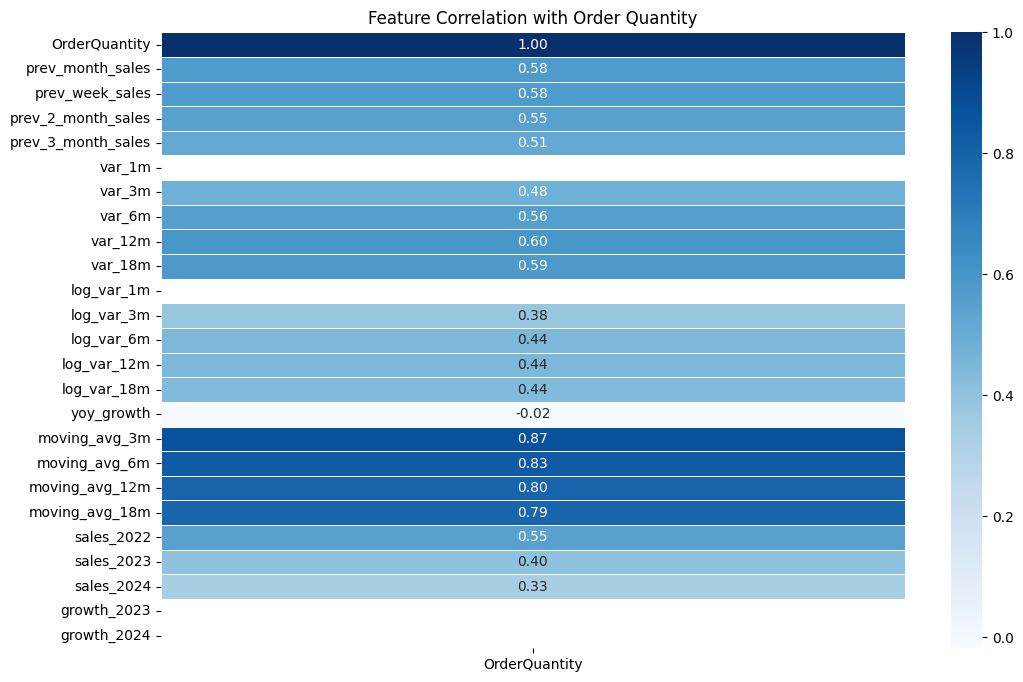

In [8]:
ph.feature_importance(custom_code_df)

In [9]:
from scipy import stats

# Define a function to compute z-scores within each product group
def compute_zscore(group, threshold=3):
    # Only compute z-score if there are at least 2 data points in the group
    if len(group) >= 2:
        group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
    else:
        group['z_score'] = 0  # or np.nan if preferred
    return group

# Group by "ProductNumber" and compute z-scores for "OrderQuantity" within each group
df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)

# Define your threshold for what constitutes an "unusually high" order
z_threshold = 3

# Filter for outliers (orders with a z_score greater than the threshold)
df_outliers = df_grouped[df_grouped['z_score'] > z_threshold]

# Display the results
print("Unusually high order quantities (per ProductNumber):")
print(df_outliers[['ProductNumber', 'OrderQuantity', 'z_score']])

print(f'Dropping: \n{df_outliers.count()}')
# Keep only rows where the z-score is within the acceptable range
df_cleaned = df_grouped[df_grouped['z_score'] <= z_threshold].drop(columns=['z_score'])

# Reset index for clarity
df_cleaned.reset_index(drop=True, inplace=True)

custom_code_df = df_cleaned


Unusually high order quantities (per ProductNumber):
                    ProductNumber  OrderQuantity   z_score
ProductNumber                                             
FRE-005-0015Y 48    FRE-005-0015Y         475000  4.034252
FRE-005-0016Z 104   FRE-005-0016Z         210000  3.438802
FRE-005-0019Z 169   FRE-005-0019Z         420000  3.244338
FRE-005-0024Y 238   FRE-005-0024Y         465000  3.440847
FRE-005-0045Z 418   FRE-005-0045Z        1440000  3.292242
FRE-005-0049Z 497   FRE-005-0049Z         720000  3.850058
FRE-005-0076Z 1067  FRE-005-0076Z         170000  3.678452
FRE-005-0081Z 1197  FRE-005-0081Z         375000  3.783414
FRE-005-0087Y 1397  FRE-005-0087Y         202500  3.417696
FRE-005-0090Z 1495  FRE-005-0090Z         315000  3.110541
FRE-005-0105X 1919  FRE-005-0105X         262500  3.215675
FRE-005-0111Y 2007  FRE-005-0111Y         457500  3.224130
FRE-005-0112W 2025  FRE-005-0112W         532500  3.190349
FRE-005-0115X 2054  FRE-005-0115X         150000  3.566041
FRE

C:\Users\44777\AppData\Local\Temp\ipykernel_20056\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_20056\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_20056\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_20056\1363007664.py:7: RuntimeWarning: Preci

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [11]:
features = ['ProductNumber', 'order_month',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
            ]
target = 'OrderQuantity'

# one-hot encoding for categorical features
categorical_features = ['ProductNumber']
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

In [12]:
df = custom_code_df

X = df[features]
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data (fit and transform used so the preprocessor learns the features)
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the validation data
X_val_preprocessed = preprocessor.transform(X_val)

# Extract feature names from the fitted pipeline
encoded_cat_features = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)

# Combine categorical and numeric feature names
all_feature_names = list(encoded_cat_features) + numeric_features

# Convert preprocessed data back to DataFrame with correct feature names and index
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names, index=X_train.index)
X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=all_feature_names, index=X_val.index)

In [13]:
# # all products order quants for defined customer list (2022-2025)
# X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# # normalize data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

In [14]:
customer_total = df.copy()

# filter the top products
total_X = customer_total[features]  # Features from top products
total_y = customer_total[target]    # Target variable

total_X_train, total_X_val, total_y_train, total_y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data (fit and transform used so the preprocessor learns the features)
total_X_train_preprocessed = preprocessor.fit_transform(total_X_train)

# Transform the validation data
total_X_val_preprocessed = preprocessor.transform(total_X_val)

# Extract feature names from the fitted pipeline
encoded_cat_features = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)

# Combine categorical and numeric feature names
all_feature_names = list(encoded_cat_features) + numeric_features

# Convert preprocessed data back to DataFrame with correct feature names and index
total_X_train_preprocessed_df = pd.DataFrame(total_X_train_preprocessed, columns=all_feature_names, index=total_X_train.index)
total_X_val_preprocessed_df = pd.DataFrame(total_X_val_preprocessed, columns=all_feature_names, index=total_X_val.index)

customer_total.head()


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,FRE-005-0006Y,2022,1,3,1,0,66.0,40000,80000.00000,80000.00000,...,53333.333333,61000.000000,61000.000000,61000.000000,40000,0,0,-100.0,NaN,0
1,FRE-005-0006Y,2022,3,10,2,0,66.0,80000,40000.00000,40000.00000,...,50000.000000,66250.000000,66250.000000,66250.000000,80000,0,0,-100.0,NaN,0
2,FRE-005-0006Y,2022,4,14,3,0,66.0,40000,30000.00000,30000.00000,...,61666.666667,61666.666667,61666.666667,61666.666667,40000,0,0,-100.0,NaN,0
3,FRE-005-0006Y,2022,6,24,1,0,66.0,30000,115000.00000,115000.00000,...,72500.000000,72500.000000,72500.000000,72500.000000,30000,0,0,-100.0,NaN,0
4,FRE-005-0006Y,2022,7,30,1,0,66.0,115000,110031.53337,110031.53337,...,115000.000000,115000.000000,115000.000000,115000.000000,115000,0,0,-100.0,NaN,0


In [15]:
# the top 10 (or change) products by total actual order quantity
top_products = df.groupby('ProductNumber')['OrderQuantity'].sum().nlargest(5)

# extract top product code rows from the original df
top_prods_df = df[df['ProductNumber'].isin(top_products.index)]

# Extract top product numbers
top_product_numbers = top_products.index.tolist()  # List of top product numbers

top_prods_df.head()

unique_order_years = custom_code_df['order_year'].unique()
print(unique_order_years)

[2022 2023 2021 2024 2025 2020]


In [16]:
print("Number of samples in top_prods_df:", len(top_prods_df))

Number of samples in top_prods_df: 159


In [17]:
# Filter the top products
tp_X = top_prods_df[features] 
tp_y = top_prods_df[target] 

# Train-test split
tp_X_train, tp_X_val, tp_y_train, tp_y_val = train_test_split(tp_X, tp_y, test_size=0.2, random_state=42)

# Fit and transform the training data (fit and transform used so the preprocessor learns the features)
tp_X_train_preprocessed = preprocessor.fit_transform(tp_X_train)

# Transform the validation data
tp_X_val_preprocessed = preprocessor.transform(tp_X_val)

# Extract feature names from the fitted pipeline
encoded_cat_features = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)

# Combine categorical and numeric feature names
all_feature_names = list(encoded_cat_features) + numeric_features

# Convert preprocessed data back to DataFrame with correct feature names and index
tp_X_train_preprocessed_df = pd.DataFrame(tp_X_train_preprocessed, columns=all_feature_names, index=tp_X_train.index)
tp_X_val_preprocessed_df = pd.DataFrame(tp_X_val_preprocessed, columns=all_feature_names, index=tp_X_val.index)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from model_utils import *

In [19]:
# train the model with scaled features (Random Forest Regressor)
rf = RandomForestRegressor()
rf_params = find_best_hyperparameters(rf, param_grids(rf.__class__.__name__), X_train_preprocessed, y_train)

Model type: RandomForestRegressor
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RandomForestRegressor Best Parameters: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}


In [20]:
print(rf_params)

{'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}


In [21]:
rf = RandomForestRegressor(**rf_params)
rf.fit(X_train_preprocessed, y_train)
y_pred_rf = rf.predict(X_val_preprocessed)

In [22]:
print('---------------------- TRAINING PERFORMANCE ----------------------')
evaluate_model(rf, X_train_preprocessed, y_train)
print('--------------------------------------------')

print('---------------------- TEST PERFORMANCE ----------------------')
evaluate_model(rf, X_val_preprocessed, y_val)
print('--------------------------------------------')

---------------------- TRAINING PERFORMANCE ----------------------
Mean Absolute Error (MAE): 5590.5100
Mean Squared Error (MSE): 243812381.7531
Root Mean Squared Error (RMSE): 15614.4927
R-squared (R²): 0.9860
--------------------------------------------
---------------------- TEST PERFORMANCE ----------------------
Mean Absolute Error (MAE): 14522.2595
Mean Squared Error (MSE): 1965372154.9945
Root Mean Squared Error (RMSE): 44332.5180
R-squared (R²): 0.9088
--------------------------------------------


In [23]:
# Train the model with scaled features (Random Forest Regressor) - TOTAL CUSTOM PRODUCTS IMPLEMENTATION
total_rf = RandomForestRegressor()
total_rf_params = find_best_hyperparameters(total_rf, param_grids(total_rf.__class__.__name__), total_X_train_preprocessed, total_y_train)

Model type: RandomForestRegressor
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RandomForestRegressor Best Parameters: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}


In [24]:
total_rf = RandomForestRegressor(**total_rf_params)
total_rf.fit(total_X_train_preprocessed, total_y_train)
total_y_pred_rf = total_rf.predict(total_X_val_preprocessed)

In [25]:
print('---------------------- TRAINING PERFORMANCE ----------------------')
evaluate_model(total_rf, total_X_train_preprocessed, total_y_train)
print('--------------------------------------------')

print('---------------------- TEST PERFORMANCE ----------------------')
evaluate_model(total_rf, total_X_val_preprocessed, total_y_val)
print('--------------------------------------------')

---------------------- TRAINING PERFORMANCE ----------------------
Mean Absolute Error (MAE): 5590.5100
Mean Squared Error (MSE): 243812381.7531
Root Mean Squared Error (RMSE): 15614.4927
R-squared (R²): 0.9860
--------------------------------------------
---------------------- TEST PERFORMANCE ----------------------
Mean Absolute Error (MAE): 14522.2595
Mean Squared Error (MSE): 1965372154.9945
Root Mean Squared Error (RMSE): 44332.5180
R-squared (R²): 0.9088
--------------------------------------------


[76488.48809523812, 156110.22321428574, 15796.334325396829, 56523.77182539683, 337976.35416666657, 51307.47023809524, 152831.55753968252, 103712.30158730158, 80667.76785714287, 44873.73917748918, 106993.8334235209, 89863.125, 68400.97222222223, 346518.12500000006, 89522.0, 67155.25000000001, 80456.47222222226, 186588.22519841272, 98755.56547619047, 70085.00000000001, 9299.738095238095, 60715.46130952382, 198565.69345238095, 132190.2380952381, 280245.63988095237, 30767.422619047626, 134156.58730158728, 579110.0983044734, 127892.50694444442, 174868.24404761905, 59479.46428571428, 474828.1150793651, 210008.24404761905, 29981.279761904756, 96263.79166666669, 27212.903769841272, 69107.97321428571, 143696.25892857145, 73231.7361111111, 141630.91765873015, 21197.42956349206, 9460.657738095239, 50594.57738095238, 7354.711309523812, 29459.836309523816, 61716.35714285713, 63720.515873015866, 135828.97321428568, 567343.1448412698, 27244.83333333333, 203916.61904761902, 100194.73214285716, 328567.

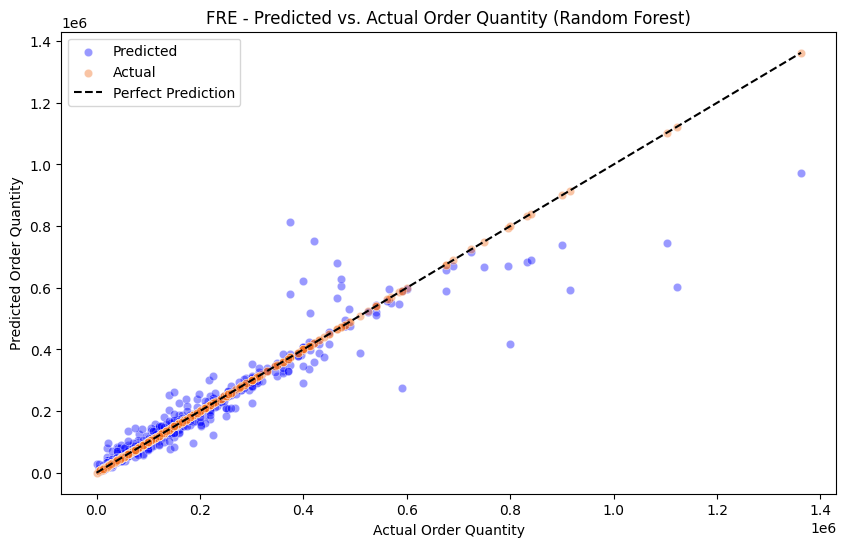

In [26]:
print(y_pred_rf.tolist())

plt.figure(figsize=(10, 6))

# Scatter plot, actual vs predicted values
sns.scatterplot(x=y_val, y=y_pred_rf, alpha=0.4, color='blue', label='Predicted')  # Predicted values in blue

# Actual values in red
sns.scatterplot(x=y_val, y=y_val, alpha=0.4, color='#f26d1d', label='Actual')

# Reference line for perfect prediction
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='black', label="Perfect Prediction")

plt.xlabel("Actual Order Quantity")
plt.ylabel("Predicted Order Quantity")
plt.title(f"{custom_ref} - Predicted vs. Actual Order Quantity (Random Forest)")
plt.legend()

plt.show()

C:\Users\44777\AppData\Local\Temp\ipykernel_20056\1606837329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_prods_df['OrderDate'] = pd.to_datetime(top_prods_df[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))


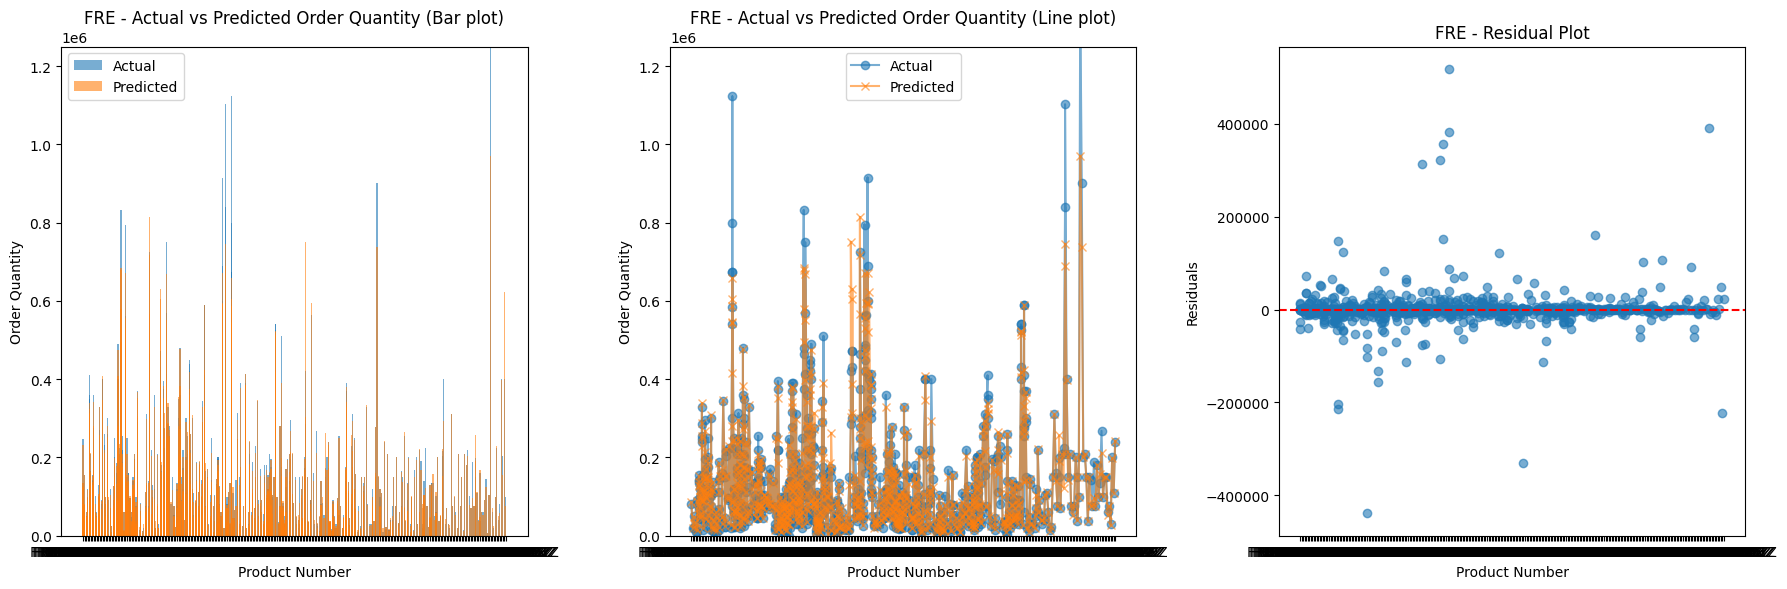

In [27]:
# Convert order year and month to datetime format
top_prods_df['OrderDate'] = pd.to_datetime(top_prods_df[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
top_prods_df = top_prods_df.sort_values(by='OrderDate')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar plot, actual and predicted values over time
axes[0].bar(df.loc[y_val.index, 'ProductNumber'], y_val, label='Actual', alpha=0.6)
axes[0].bar(df.loc[y_val.index, 'ProductNumber'], y_pred_rf, label='Predicted', alpha=0.6)
axes[0].set_xlabel('Product Number')
axes[0].set_ylabel('Order Quantity')
axes[0].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity (Bar plot)')
axes[0].set_ylim(0, 1250000)
axes[0].legend()

# Line plot, actual and predicted values
sorted_indices = df.loc[y_val.index, 'ProductNumber'].argsort()
sorted_products = df.loc[y_val.index, 'ProductNumber'].iloc[sorted_indices]
sorted_actual = y_val.iloc[sorted_indices]
sorted_predicted = y_pred_rf[sorted_indices]

axes[1].plot(sorted_products, sorted_actual, label='Actual', alpha=0.6, marker='o')
axes[1].plot(sorted_products, sorted_predicted, label='Predicted', alpha=0.6, marker='x')
axes[1].set_xlabel('Product Number')
axes[1].set_ylabel('Order Quantity')
axes[1].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity (Line plot)')
axes[1].set_ylim(0, 1250000)
axes[1].legend()

# Residual plot
residuals = y_val - y_pred_rf
axes[2].scatter(df.loc[y_val.index, 'ProductNumber'], residuals, alpha=0.6)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_xlabel('Product Number')
axes[2].set_ylabel('Residuals')
axes[2].set_title(f'{custom_ref} - Residual Plot')

plt.tight_layout()
plt.show()


In [28]:
# Convert order year and month to datetime format
customer_total['OrderDate'] = pd.to_datetime(customer_total[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
customer_total = customer_total.sort_values(by='OrderDate')

In [29]:
# total_y_val.type

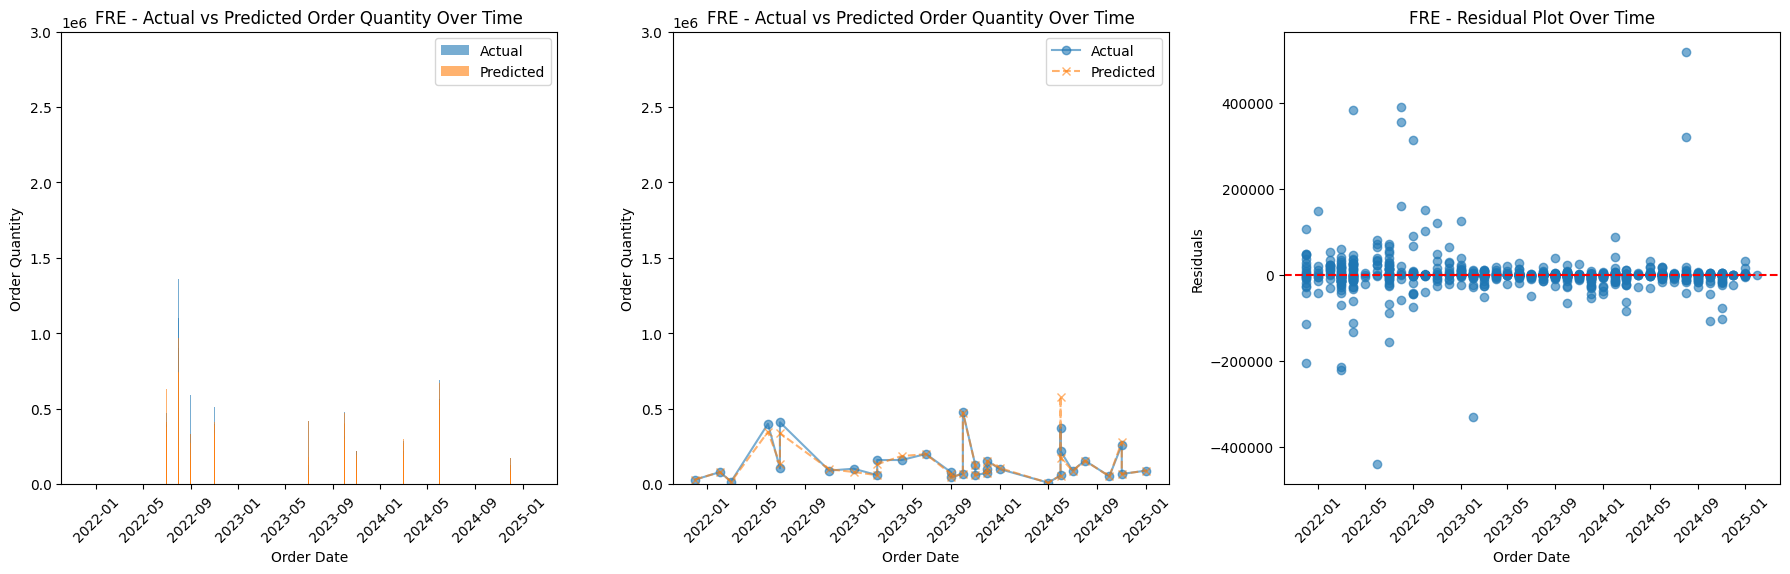

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar plot, actual and predicted values over time
axes[0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_val, label='Actual', alpha=0.6)
axes[0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_pred_rf, label='Predicted', alpha=0.6)
axes[0].set_xlabel('Order Date')
axes[0].set_ylabel('Order Quantity')
axes[0].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity Over Time')
axes[0].set_ylim(0, 3000000)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Line plot, actual and predicted values over time
sorted_indices = top_prods_df.loc[tp_y_val.index, 'OrderDate'].argsort()
sorted_dates = top_prods_df.loc[tp_y_val.index, 'OrderDate'].iloc[sorted_indices]
sorted_actual = total_y_val.iloc[sorted_indices]
sorted_predicted = total_y_pred_rf[sorted_indices]

axes[1].plot(sorted_dates, sorted_actual, label='Actual', alpha=0.6, marker='o', linestyle='-')
axes[1].plot(sorted_dates, sorted_predicted, label='Predicted', alpha=0.6, marker='x', linestyle='--')
axes[1].set_xlabel('Order Date')
axes[1].set_ylabel('Order Quantity')
axes[1].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity Over Time')
axes[1].set_ylim(0, 3000000)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Residual plot over time
residuals = total_y_val - total_y_pred_rf
axes[2].scatter(customer_total.loc[total_y_val.index, 'OrderDate'], residuals, alpha=0.6)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_xlabel('Order Date')
axes[2].set_ylabel('Residuals')
axes[2].set_title(f'{custom_ref} - Residual Plot Over Time')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [31]:
# # to see dataframe structure
# customer_total.head()


In [32]:
# # to see prediction nparray structure
# total_y_pred_rf

In [33]:
# # Group data by OrderDate and sum the relevant numerical columns
# customer_total = top_prods_df.groupby('OrderDate').sum(numeric_only=True).reset_index()

In [34]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv,OrderDate
2134,FRE-005-0120Z,2020,11,48,2,0,66.0,20000,110031.53337,110031.53337,...,20000.000000,20000.000000,20000.000000,0,0,0,NaN,NaN,0,2020-11-01
1279,FRE-005-0084Z,2021,7,28,2,0,66.0,190000,250000.00000,250000.00000,...,146666.666667,192083.333333,186666.666667,0,0,0,NaN,NaN,5000,2021-07-01
1481,FRE-005-0090Z,2021,7,28,2,0,66.0,190000,20000.00000,20000.00000,...,179166.666667,152083.333333,120277.777778,0,0,0,NaN,NaN,0,2021-07-01
3892,FRE-005-0316Z,2021,10,42,4,0,66.0,250000,50000.00000,50000.00000,...,81250.000000,81250.000000,81250.000000,0,0,0,NaN,NaN,0,2021-10-01
962,FRE-005-0070Y,2021,12,52,0,0,66.0,120000,110000.00000,110000.00000,...,131666.666667,121000.000000,121000.000000,0,0,0,NaN,NaN,0,2021-12-01


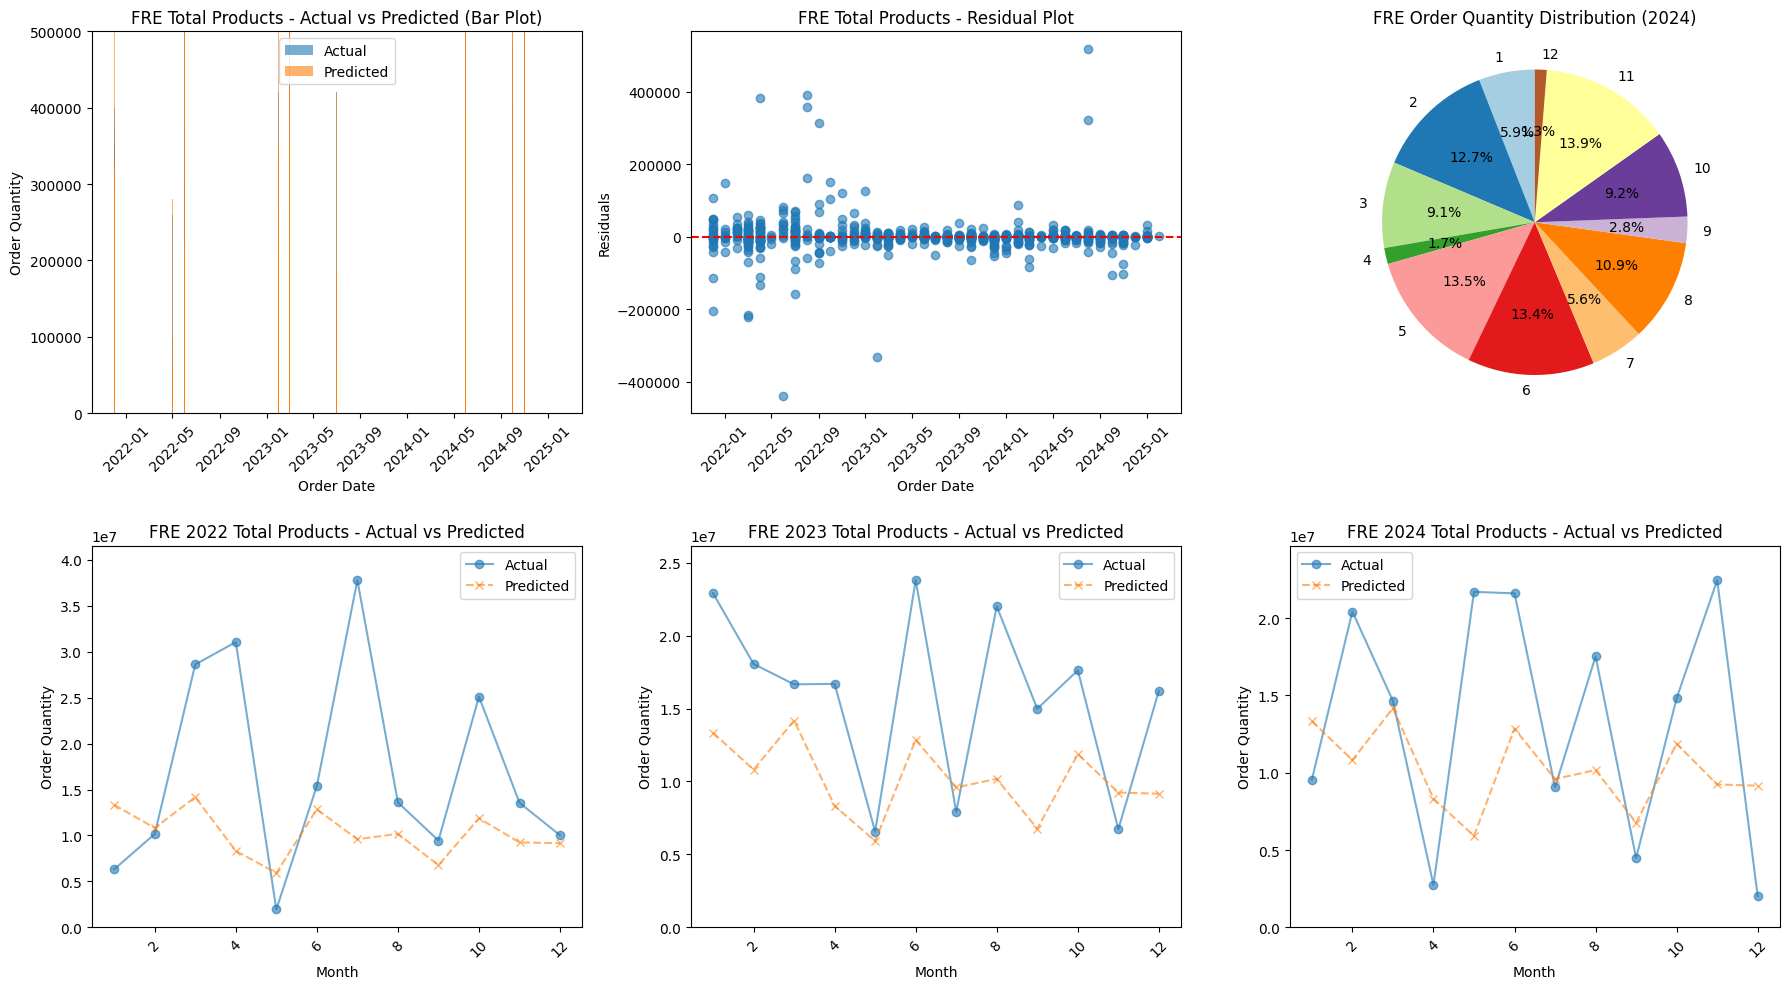

In [35]:
# Subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Layout

# Bar plot: Actual vs. Predicted Order Quantity
axes[0, 0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_val, label='Actual', alpha=0.6)
axes[0, 0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_pred_rf, label='Predicted', alpha=0.6)
axes[0, 0].set_xlabel('Order Date')
axes[0, 0].set_ylabel('Order Quantity')
axes[0, 0].set_title(f'{custom_ref} Total Products - Actual vs Predicted (Bar Plot)')
axes[0, 0].set_ylim(0, 500_000)
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# Residual Plot
residuals = total_y_val - total_y_pred_rf
axes[0, 1].scatter(customer_total.loc[total_y_val.index, 'OrderDate'], residuals, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Order Date')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title(f'{custom_ref} Total Products - Residual Plot')
axes[0, 1].tick_params(axis='x', rotation=45)

# Pie Chart: Order Quantity per Month (2024)
order_2024 = customer_total[customer_total['order_year'] == 2024].groupby('order_month')['OrderQuantity'].sum()
axes[0, 2].pie(order_2024, labels=order_2024.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0, 2].set_title(f'{custom_ref} Order Quantity Distribution (2024)')

# Line Plots: Yearly Trends
for i, year in enumerate([2022, 2023, 2024]):  
    yearly_df = customer_total[customer_total['order_year'] == year]

    if yearly_df.empty:
        continue  # Skip if no data for that year

    # Aggregate OrderQuantity per month
    monthly_actual = yearly_df.groupby('order_month')['OrderQuantity'].sum()

    # Convert total_y_pred_rf to Pandas Series with index from customer_total
    pred_series = pd.Series(total_y_pred_rf, index=total_y_val.index)

    # Group predictions by month
    monthly_predicted = pred_series.groupby(customer_total.loc[total_y_val.index, 'order_month']).sum()

    # Sort for proper plotting
    monthly_actual = monthly_actual.sort_index()
    monthly_predicted = monthly_predicted.reindex(monthly_actual.index)  # Ensure same months

    # Plot actual and predicted values for the year
    axes[1, i].plot(monthly_actual.index, monthly_actual, label='Actual', alpha=0.6, marker='o', linestyle='-')
    axes[1, i].plot(monthly_predicted.index, monthly_predicted, label='Predicted', alpha=0.6, marker='x', linestyle='--')

    axes[1, i].set_xlabel('Month')
    axes[1, i].set_ylabel('Order Quantity')
    axes[1, i].set_title(f'{custom_ref} {year} Total Products - Actual vs Predicted')
    axes[1, i].set_ylim(0, max(monthly_actual.max(), monthly_predicted.max()) * 1.1)  # Scale Y axis
    axes[1, i].legend()
    axes[1, i].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()


In [36]:
# Checking if orders are in 2022 for customer (may be a new customer)
has_orders_2022 = not customer_total[customer_total['order_year'] == 2022].empty
print(f"Orders in 2022 exist: {has_orders_2022}")


Orders in 2022 exist: True


In [37]:
customer_total.head(10)

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv,OrderDate
2134,FRE-005-0120Z,2020,11,48,2,0,66.0,20000,110031.53337,110031.53337,...,20000.000000,20000.000000,20000.000000,0,0,0,NaN,NaN,0,2020-11-01
1279,FRE-005-0084Z,2021,7,28,2,0,66.0,190000,250000.00000,250000.00000,...,146666.666667,192083.333333,186666.666667,0,0,0,NaN,NaN,5000,2021-07-01
1481,FRE-005-0090Z,2021,7,28,2,0,66.0,190000,20000.00000,20000.00000,...,179166.666667,152083.333333,120277.777778,0,0,0,NaN,NaN,0,2021-07-01
3892,FRE-005-0316Z,2021,10,42,4,0,66.0,250000,50000.00000,50000.00000,...,81250.000000,81250.000000,81250.000000,0,0,0,NaN,NaN,0,2021-10-01
962,FRE-005-0070Y,2021,12,52,0,0,66.0,120000,110000.00000,110000.00000,...,131666.666667,121000.000000,121000.000000,0,0,0,NaN,NaN,0,2021-12-01
485,FRE-005-0049Z,2021,12,51,3,0,66.0,375000,105000.00000,105000.00000,...,235833.333333,265416.666667,207638.888889,0,0,0,NaN,NaN,190000,2021-12-01
3768,FRE-005-0307Z,2021,12,52,0,0,66.0,60000,120000.00000,120000.00000,...,127500.000000,121875.000000,100416.666667,0,0,0,NaN,NaN,35000,2021-12-01
2620,FRE-005-0188Z,2021,12,51,3,0,66.0,40000,37500.00000,37500.00000,...,44000.000000,44000.000000,44000.000000,0,0,0,NaN,NaN,0,2021-12-01
2625,FRE-005-0189Z,2021,12,52,0,0,66.0,30000,60000.00000,60000.00000,...,52500.000000,52500.000000,52500.000000,0,0,0,NaN,NaN,0,2021-12-01
2631,FRE-005-0209Z,2021,12,51,3,0,66.0,20000,37500.00000,37500.00000,...,37500.000000,37500.000000,37500.000000,0,0,0,NaN,NaN,0,2021-12-01


In [38]:
# from powerbiclient import QuickVisualize, get_dataset_config, Report
# from powerbiclient.authentication import InteractiveLoginAuthentication, DeviceCodeLoginAuthentication
# import pandas as pd

# prod_sales = pd.read_csv(
#     '/Users/mwilko777/Desktop/Project/Software Artifact/datasets/stock_forecasting/final/product_sales.csv')

# # use DeviceCodeLoginAuthentication if want to sign in each time, else InteractiveLoginAuthentication
# auth = InteractiveLoginAuthentication()
# print("Authentication successful.")


# def visual():
#     dataset_config = get_dataset_config(prod_sales)
#     return QuickVisualize(dataset_config, auth)

# visual()

In [39]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv,OrderDate
2134,FRE-005-0120Z,2020,11,48,2,0,66.0,20000,110031.53337,110031.53337,...,20000.000000,20000.000000,20000.000000,0,0,0,NaN,NaN,0,2020-11-01
1279,FRE-005-0084Z,2021,7,28,2,0,66.0,190000,250000.00000,250000.00000,...,146666.666667,192083.333333,186666.666667,0,0,0,NaN,NaN,5000,2021-07-01
1481,FRE-005-0090Z,2021,7,28,2,0,66.0,190000,20000.00000,20000.00000,...,179166.666667,152083.333333,120277.777778,0,0,0,NaN,NaN,0,2021-07-01
3892,FRE-005-0316Z,2021,10,42,4,0,66.0,250000,50000.00000,50000.00000,...,81250.000000,81250.000000,81250.000000,0,0,0,NaN,NaN,0,2021-10-01
962,FRE-005-0070Y,2021,12,52,0,0,66.0,120000,110000.00000,110000.00000,...,131666.666667,121000.000000,121000.000000,0,0,0,NaN,NaN,0,2021-12-01


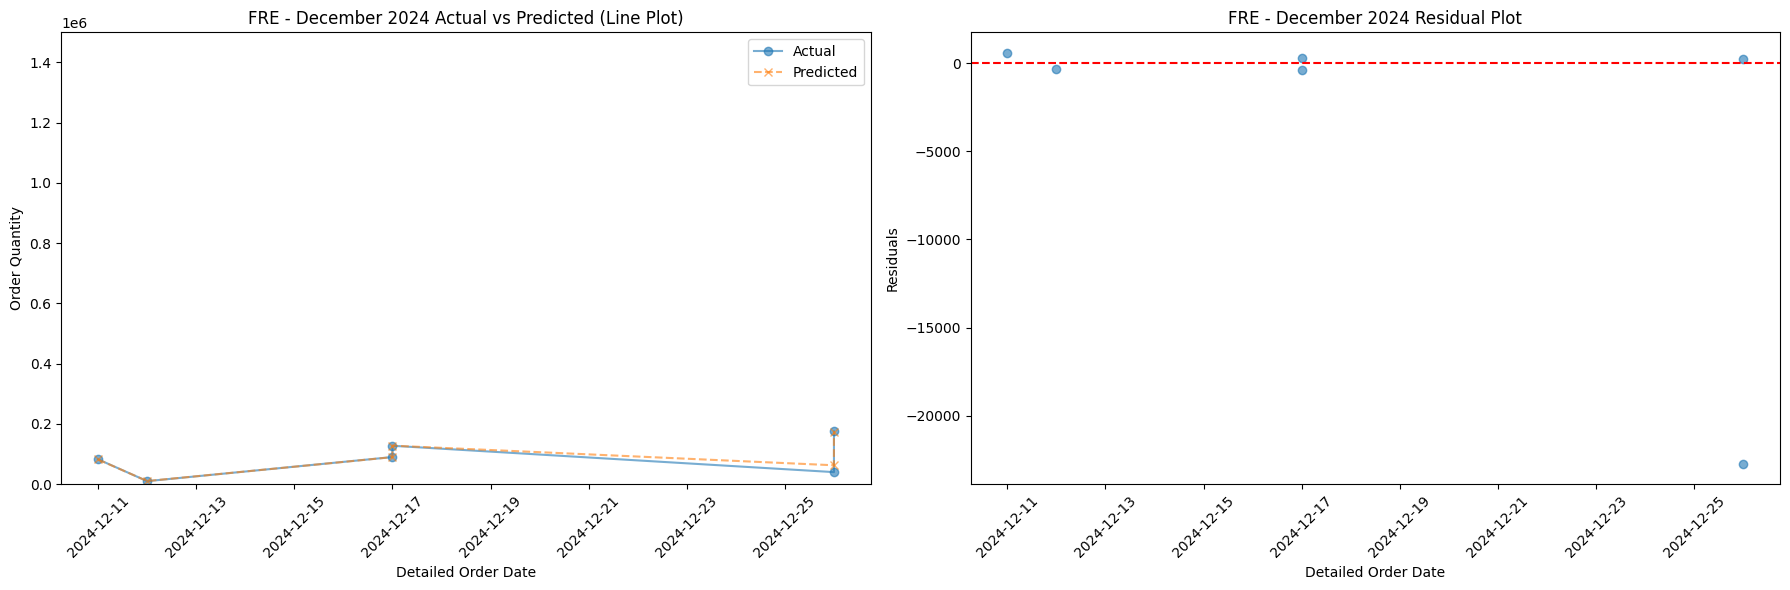

In [40]:
# Create a DetailedOrderDate column using week and weekday information.
customer_total['DetailedOrderDate'] = pd.to_datetime(
    customer_total['order_year'].astype(str) +
    customer_total['order_week'].astype(str).str.zfill(2) +
    customer_total['order_weekday'].astype(str),
    format='%Y%W%w'
)

# Filter the data for December 2024 using DetailedOrderDate
dec_2024_data = customer_total[
    (customer_total['DetailedOrderDate'].dt.year == 2024) &
    (customer_total['DetailedOrderDate'].dt.month == 12)
]

# Use only the common indices between dec_2024_data and y_val
common_index = dec_2024_data.index.intersection(y_val.index)
dec_2024_actual = y_val.loc[common_index]
# Convert y_pred_rf to a Series for indexing (using the same index as y_val)
y_pred_rf_series = pd.Series(y_pred_rf, index=y_val.index)
dec_2024_predicted = y_pred_rf_series.loc[common_index]

# Sort by DetailedOrderDate from dec_2024_data for the common indices.
sorted_indices = dec_2024_data.loc[common_index, 'DetailedOrderDate'].argsort()
sorted_dates = dec_2024_data.loc[common_index, 'DetailedOrderDate'].iloc[sorted_indices]
sorted_actual = dec_2024_actual.iloc[sorted_indices]
sorted_predicted = dec_2024_predicted.iloc[sorted_indices]

# Create subplots (1 row, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Line Plot: Actual vs. Predicted Order Quantity using DetailedOrderDate
axes[0].plot(sorted_dates, sorted_actual, label='Actual', alpha=0.6, marker='o', linestyle='-')
axes[0].plot(sorted_dates, sorted_predicted, label='Predicted', alpha=0.6, marker='x', linestyle='--')
axes[0].set_xlabel('Detailed Order Date')
axes[0].set_ylabel('Order Quantity')
axes[0].set_title(f'{custom_ref} - December 2024 Actual vs Predicted (Line Plot)')
axes[0].set_ylim(0, 1_500_000)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Residual Plot for December 2024
residuals_dec_2024 = sorted_actual - sorted_predicted
axes[1].scatter(sorted_dates, residuals_dec_2024, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Detailed Order Date')
axes[1].set_ylabel('Residuals')
axes[1].set_title(f'{custom_ref} - December 2024 Residual Plot')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
